# Data Description

> #### Banka Verisi

* Bad = 0 ödenmemiş , Bad = 1 ödenmiş 
* Loan : Kredi talebi tutarı
* Mortdue : Mevcut borç
* Value : Mevcut servet
* Reason : DebtCon= borç ödemek için / HomeImp = ev kredisi
* Job : Müşterinin işi ( 6 kategori var )
* Yoj : Müşterinin işindeki senesi
* Derog : Raporların sayısı (negatif)
* Delinq : Ödenmemiş kredi limit sayısı
* Clage : En eski kredi limitinin yaşı
* Ninq : Güncel son kredi sorgusunun sayısı
* Clnq : kredi limit sayısı
* Debtinc : Borç / Gelir orani

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pylab
import scipy 

import statsmodels.stats.api as sms

import statsmodels.api as sm
import scipy.stats as stats

import matplotlib.pyplot as plt

from scipy import stats
from matplotlib.pyplot import plot
from scipy.stats import levene
from scipy.stats import shapiro


from scipy import stats

In [27]:
class Information():
    
    def __init__(self,filename):
        data = pd.read_csv(filename)
        print("**\n First 5 data: \n", data.head())
        print("** \n Last 5 data: \n", data.tail())
        
    def describeI(self):
        print("Data Describe: \n",data.describe().T)

    def info():
        print("Data Info: ",data.info())
        print("Data Lenght: ", data.len())
    
    def columns(self):
        print("Data Columns: ",data.columns)

    def columnTypes():
        print("Data Types: ", data.dtypes())
        
    def nullValues(self):
        print("Null Values (any): ", self.data.isnull().values.any())
        print("Null Values (sum): ", self.data.isnull().sum())
        
    def count(self):
        print("Count: ",self.data.count())
        
    def num_data(self):
        print("Numerical Data: ",self.data.select_dtypes(include=['float64','int64']))
    
    def cat_data(self):
        print("Categorical Data: ",self.data.select_dtypes(include=["object"])) 
        
    def shape(self):
        print(data.shape)

#  1. Load and Read Data

In [28]:
dataC = Information("hmelq.csv")

**
 First 5 data: 
    bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0    0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1    0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2    0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3    0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4    0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327  
** 
 Last 5 data: 
       bad   loan   mortdue    value   reason   job  yoj  derog  delinq  \
3571    1   8400   31800.0  72000.0  DebtCon  Self  NaN    0.0     2.0   
3572    1  21600  154991.0      NaN  DebtCon  Self  NaN    2.0     4.0   
3573    1  24000   35000.0      NaN  DebtCon  Self  3.0    1.0     0.0   
3574    1  10000       NaN  25010

In [31]:
df = pd.read_csv("hmelq.csv")

# veri hakkında bilgi alma
# 3576 x 13 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   object 
 5   job      3409 non-null   object 
 6   yoj      3264 non-null   float64
 7   derog    3149 non-null   float64
 8   delinq   3225 non-null   float64
 9   clage    3397 non-null   float64
 10  ninq     3273 non-null   float64
 11  clno     3443 non-null   float64
 12  debtinc  2809 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


### Bad iyi - kötü müşteriyi temsil ettiğinden kategorik veri tipine dönüştürme

In [4]:
df["bad"] = [ "iyi" if each==0 else "kötü" for each in df["bad"]]
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,iyi,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,iyi,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,iyi,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,iyi,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,iyi,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


Veristesindeki kategorik değişkenler :
* bad
* reason
* job

In [5]:
df.describe()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,3576.000000,3262.000000,3512.000000,3264.000000,3149.000000,3225.000000,3397.000000,3273.000000,3443.000000,2809.000000
mean,18529.697987,74013.907992,101076.922759,8.832644,0.261670,0.432558,179.832529,1.186373,21.507116,33.831737
std,11262.834060,44016.833772,54865.275351,7.568046,0.865178,1.099230,87.066198,1.728723,10.167490,9.061837
min,1100.000000,2619.000000,8800.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,0.720000
25%,11000.000000,46700.250000,65753.000000,3.000000,0.000000,0.000000,115.600000,0.000000,15.000000,29.140000
50%,16200.000000,65858.000000,89183.000000,7.000000,0.000000,0.000000,173.640000,1.000000,20.000000,34.747000
75%,23100.000000,91717.000000,118928.250000,13.000000,0.000000,0.000000,230.710000,2.000000,26.000000,38.940000
max,89900.000000,399550.000000,850000.000000,41.000000,10.000000,15.000000,1168.230000,17.000000,71.000000,203.312000


# 2. Data Cleaning

In [6]:
df.shape

(3576, 13)

In [7]:
# Datasetindeki Nan değerlerin sayısınu görme
df.isnull().sum()

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [8]:
# datasetinden Nan değerleri kaldırma
df_2 = df.dropna()
df_2.shape

# 1558 data (row) silindi

(2018, 13)

# 3. Relationship between the data features

## 3.1. Confusion Matrix

- Kategorik - Kategorik İlişkiler

##### Müşterilerdan kaçı iyi - kaçı kötü profile sahip

In [9]:
# Cross table : ikili ilişikileri görmeyi saglar

pay_ORnot = pd.crosstab(index=df_2["bad"], columns=df_2["bad"])
pay_ORnot.index = ["Pay","NOT Pay"]
pay_ORnot

bad,iyi,kötü
Pay,1840,0
NOT Pay,0,178


1840 müşteri kredisini geri öderken, 178 kişi ödemiyor.

In [10]:
print("Kötü müşteri oranı",(178 / 2018))

Kötü müşteri oranı 0.08820614469772052


##### Müşteri profili - Reason ilişkisine bakma

In [11]:
pay_ORnotReason = pd.crosstab(index=df_2["bad"], columns=df_2["reason"])
pay_ORnotReason

reason,DebtCon,HomeImp
bad,,
iyi,1304,536
kötü,124,54


In [12]:
print("Ev kredisi alan müşterilerin ödeme oranı :", 1304/(1304+124))
print("Borç ödemek için kredisi alan müşterilerin ödeme oranı :", 536/(536+34))

Ev kredisi alan müşterilerin ödeme oranı : 0.9131652661064426
Borç ödemek için kredisi alan müşterilerin ödeme oranı : 0.9403508771929825


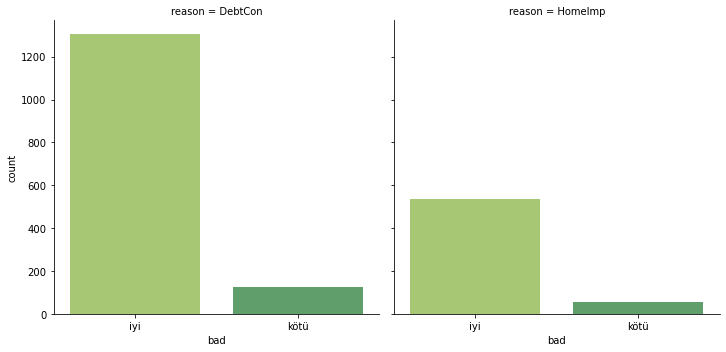

In [13]:
sns.catplot(x="bad", col="reason", data=df_2, palette="summer_r", kind="count")

##### Müşteri profili - Job ilişkisine bakma

In [14]:
pay_ORnotJob = pd.crosstab(index=df_2["bad"], columns=df_2["job"])
pay_ORnotJob

job,Mgr,Office,Other,ProfEx,Sales,Self
bad,,,,,,
iyi,242,326,694,504,23,51
kötü,27,22,80,35,7,7


##### 18.07 bu derste yapıldı

In [15]:
derog_bad = pd.crosstab(index=df_2["bad"], columns=df_2["derog"])
derog_bad

derog,0.0,1.0,2.0,3.0,4.0,6.0,7.0,8.0,10.0
bad,,,,,,,,,
iyi,1690,107,38,5,0,0,0,0,0
kötü,133,21,10,7,3,1,1,1,1


In [16]:
chi2,p, dof, expected = stats.chi2_contingency(derog_bad)
results= [
    ['Item', 'Value'],
    ['Chi-Square Test', chi2],
    ['P-Value', p]
]

results

[['Item', 'Value'],
 ['Chi-Square Test', 131.97903032767286],
 ['P-Value', 1.0997148121548677e-24]]

##### 18.07 bu derste yapıldı

## 3.2. Correlation


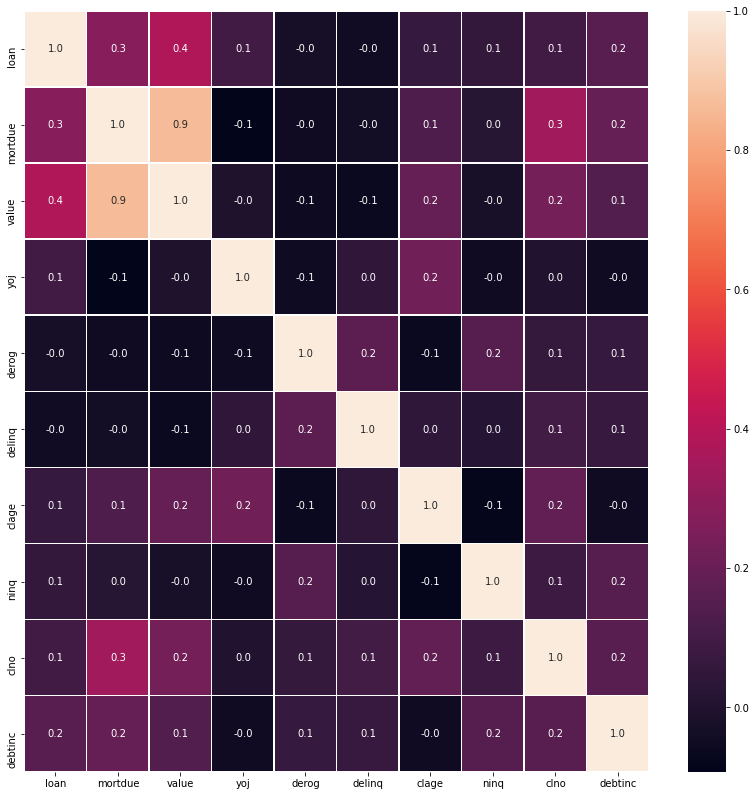

In [17]:
f,ax = plt.subplots(figsize=(14,14))
sns.heatmap(df_2.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

(+)

* value & mortdue arasındaki corr ilişkisi güçlü (0.9)
* value & loan arasındaki corr ilişkisi güçlü (0.4)
* loan & mortdue arasındaki corr ilişkisi güçlü (0.3)
* clno & mortdue arasındaki corr ilişkisi güçlü (0.3)

(-)

* yoj & derog arasındaki corr ilişkisi zayıf (- 0.1)
* clage & derog arasındaki corr ilişkisi zayıf (- 0.1)
* clage & ninq arasındaki corr ilişkisi zayıf (- 0.1)

## 3.3 Numeric Features

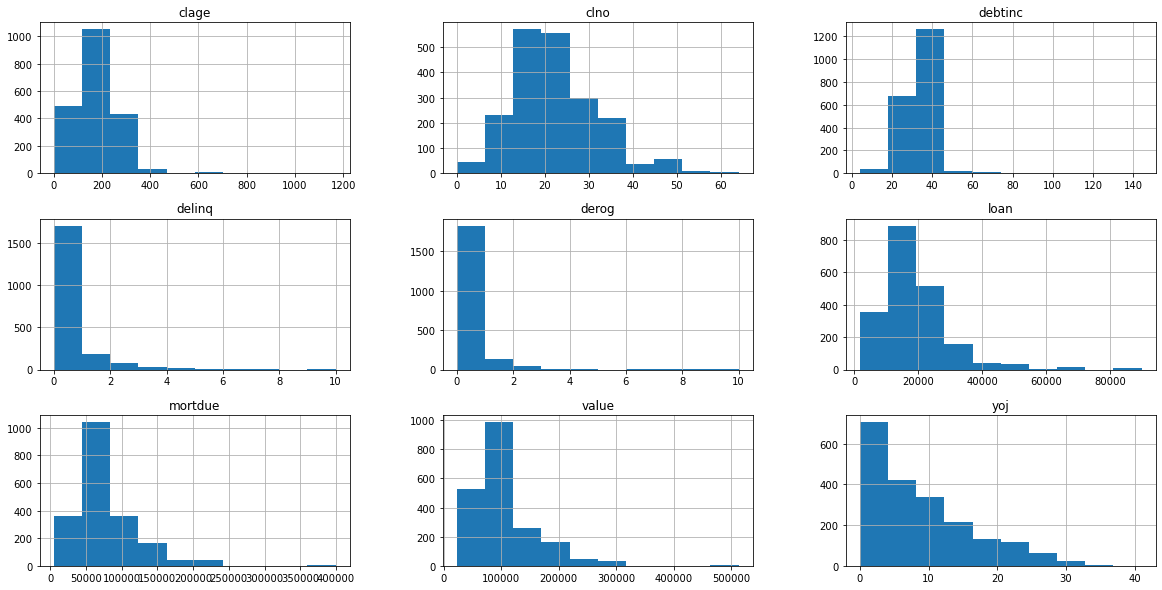

In [18]:
df_hist=df_2[["loan","clno",'mortdue', "derog","delinq","clage","value", "yoj", "debtinc"]]
df_hist.hist(bins=10,figsize=(20,10))
plt.show()

Normal dağılım : 
* dage 
* clno
* debtinc

Sağdan Çarpık :
* delinq
* derog 
* loan
* mortdue
* value 
* yoj

# 4. Hipotez Test

> Tek örneklem T-test

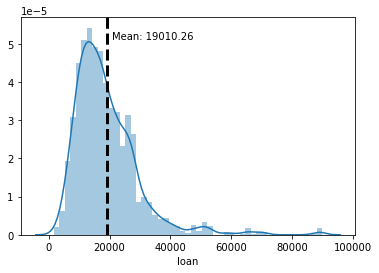

In [19]:
ax = sns.distplot(df_2["loan"])
plt.axvline(np.mean(df_2["loan"]), color="k", linestyle="dashed", linewidth=3)
_, max_ = plt.ylim()
plt.text(
    df_2["loan"].mean() + df_2["loan"].mean()/10,
    max_ - max_ / 10,
    "Mean: {:.2f}".format(df_2["loan"].mean())
)
plt.show()

# Sağdan Çarpık

## Hipotez 1 : Loan 

### QQ Plot

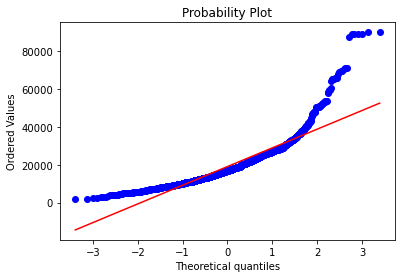

In [20]:
stats.probplot(df_2["loan"], dist="norm", plot=pylab) # normal probability plot
pylab.show()

Grafiğe göre normal dağılım olup olmadığı gözlemlenememektedir.

### Shapiro
Normal dağılımdan gelip gelmemesinin kontrolü

* H0 : Örnek dağılım ile teorik dağılım arasında istatistik olarak anlamlı bir farklılık yoktur.
* H1 : Örnek dağılım ile teorik dağılım arasında istatistik olarak anlamlı bir farklılık vardır.

In [21]:
stats, p = shapiro(df_2["loan"])
print('Statistics-%.3f, p=%.3f' % (stats,p))

Statistics-0.836, p=0.000


p < 0.05

Normallik varsayımı sağlanmadı. T-test yapılmaz.


### Nonparametrik Tek Örneklem T Testi

In [22]:
from statsmodels.stats.descriptivestats import sign_test

In [23]:
stats, p = sign_test(df_2["loan"])
print('Statistics %.3f, p=%.3f' % (stats,p))

Statistics 1009.000, p=0.000


p < 0.05

H0 reddedilir.

Yani : Örnek dağılım ile teorik dağılım arasında istatistik olarak anlamlı bir farklılık vardır.

##### Loan feature ayırı edici bir özelliktir.

## Hipotez 2 : Kredi tutarının ödemeye etkisi

H0 = Kredisini ödeyen insanların kredi miktarı ile, Kredisini ödemeyenler insanların kredi miktarı aynıdır

H1 = Değildir

In [24]:
loan_df = df_2[["loan","bad"]]

load_iyi = loan_df[:50] # 50 sample
load_kötü = loan_df[1900:1950]
print(load_iyi)
print(load_kötü)

      loan  bad
153  18200  iyi
154  21700  iyi
155  34100  iyi
156   8400  iyi
157  17400  iyi
158  23900  iyi
159  19700  iyi
160  17300  iyi
161  11700  iyi
162  25300  iyi
163  11300  iyi
164  12000  iyi
165  17400  iyi
166  15800  iyi
167   9800  iyi
168  25900  iyi
169   8500  iyi
170  21800  iyi
171  28400  iyi
172  14300  iyi
173  19800  iyi
174  15200  iyi
175  12300  iyi
176  18200  iyi
177  32400  iyi
178  19500  iyi
179  32300  iyi
180  21800  iyi
181  17000  iyi
182  22600  iyi
183  23000  iyi
184  33100  iyi
185   8500  iyi
186  31900  iyi
187  23300  iyi
188  26600  iyi
189   9900  iyi
190  20100  iyi
191  33700  iyi
192  39700  iyi
193  19300  iyi
194  35000  iyi
195   8400  iyi
196  13800  iyi
197  16200  iyi
198  13300  iyi
199  22800  iyi
200  25300  iyi
201  15700  iyi
202  11900  iyi
       loan   bad
3070  15300  kötü
3071  16500  kötü
3072   5900  kötü
3073  16500  kötü
3074   5500  kötü
3075  10300  kötü
3076  25900  kötü
3077   8000  kötü
3078  10000  kötü
3080

In [25]:
type(load_iyi)

pandas.core.frame.DataFrame

### Shapiro

In [26]:
stats, p = shapiro(load_iyi["loan"])
print('Statistics-%.3f, p=%.3f' % (stats,p))

Statistics-0.955, p=0.055


p > 0.05

Varsayım sağlanıyor.

H0 reddedilemiyor.

In [27]:
stats, p = shapiro(load_kötü["loan"])
print('Statistics-%.3f, p=%.3f' % (stats,p))

Statistics-0.939, p=0.012


In [28]:
0.012 > 0.05


False

p > 0.05

Varsayım sağlanıyor.

H0 reddedilemiyor.

##### Normallik varsayımı sağlandı

### Varyans Homojenliği Varsayımı

##### levene

In [29]:
levene(load_iyi["loan"], load_kötü["loan"]) #varyanslara bakma

LeveneResult(statistic=0.0029682903818768628, pvalue=0.9566620484214456)

p value > 0.05

H0 reddedilemez

Varyanslar homojendir.

In [30]:
stats.ttest_ind(load_iyi["loan"], load_kötü["loan"], equal_var=True)

AttributeError: 'float' object has no attribute 'ttest_ind'

p value < 0.05 

Farklılık vardır. 

H0 hipotezi reddedilir.

#### YANİ ;
* Kredisini ödeyen insanların kredi miktarı ile, Kredisini ödemeyenler insanların kredi miktarı aynı DEĞİLDİR.

* LOAN Miktari müşterinin krediyi ödeyip ödememesini etkiliyor.

## Hipotez 3 : Mevcut borcun kredi ödemesine etkisi

In [ ]:
sns.barplot(x="bad", y="mortdue", data=df_2)
plt.show()

Grafikte etkisi olmadığı gözüküyor. 

H0 = Mevcut borcun kredi ödemesine etkisi yoktur

H1 = Vardır

In [ ]:
mortdue_kötü = df_2["mortdue"][df_2.bad=="kötü"]
mortdue_iyi = df_2["mortdue"][df_2.bad=="iyi"]
mortdue_iyi = mortdue_iyi[:178]

In [ ]:
mortdue_iyi.shape

### Shapiro

In [ ]:
stats, p = shapiro(mortdue_iyi)
print('Statistics-%.3f, p=%.3f' % (stats,p))

p < 0.05

Varsayım sağlanmıyor.

In [ ]:
stats, p = shapiro(mortdue_kötü)
print('Statistics-%.3f, p=%.3f' % (stats,p))

p < 0.05

Varsayım sağlanmıyor.

Normallik varsayımı sağlanmadı

In [ ]:
levene(mortdue_iyi, mortdue_kötü) #varyanslara bakma

p value > 0.05

H0 reddedilemez

Varyanslar homojendir.

### Nonparametrik Bağımsız İki Örneklem T Testi
* Normallik varsayımı sağlanmıyorsa bu teste başvurulur

In [ ]:
len(mortdue_iyi)

In [ ]:
A = pd.DataFrame
A

In [ ]:
A = mortdue_iyi

In [ ]:
# A ve A'nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:]="iyi"


A = pd.concat([A, GRUP_A], axis=1)
A

In [ ]:
test_ist , pvalue = stats.mannwhitneyu(mortdue_iyi, mortdue_kötü)
print("Test istatistiği = %.4f, pdegeri = %.4f" % (test_ist , pvalue))

-

## Hipotez 4 : İşin kredi nedenine etkisi

In [ ]:
reasonJob = pd.crosstab(index=df_2["reason"], columns=df_2["job"])
reasonJob

In [ ]:
sns.countplot(df_2["reason"],hue=df_2["job"], data=df_2)
plt.show()

Grafikte işin kredi nedenine etkisi yok gibi duruyor.

Bunu istatistiksel yaklaşımla şansa bağlı olup olmadığını değerlendirelim.

In [ ]:
from scipy.stats import ttest_ind

H0 : İşin kredi nedenine etkisi yoktur

H1 : İşin kredi nedenine etkisi vardır

In [ ]:
stat, pvalue = shapiro(df_2["loan"])

In [ ]:
pd.crosstab([df_2["reason"],df_2["job"]], df_2["bad"], margins=True).T

##### Shapiro Wilks Testi 
H0 = Örnek dağılım ile teorik dağılım arasında istatistik olarak anlamlı bir farklılık yoktur.

H1 =  Örnek dağılım ile teorik dağılım arasında istatistik olarak anlamlı bir farklılık vardır.

In [ ]:
stats, p = shapiro(df_2["loan"])
print('Statistics-%.3f, p=%.3f' % (stats,p))